# In this notebook I'll do some tests and play around with defining/applying warping images

In [1]:
#imports
from warp import *
import os, glob

In [2]:
#quickly display a single image
def displayimage(img) :
    plt.imshow(img,cmap='gray')
    #plt.xticks([]), plt.yticks([])
    plt.show()

In [3]:
#whether or not to do some extra visualization stuff
#verbose = False
verbose = True
#how many images to warp in the loop
max_images = 2
#some default image parameters
def_nlayers = 35

### Let's test the ability to make a warping field like Alex's

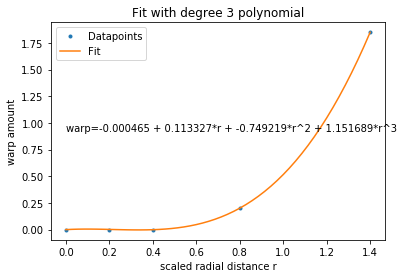

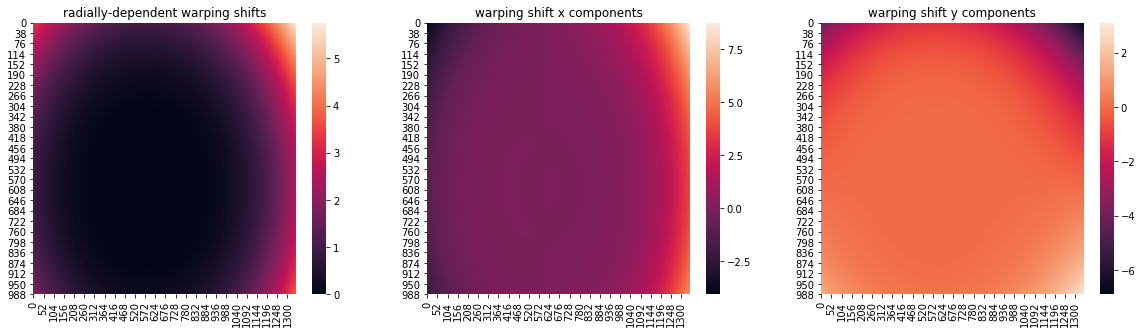

In [4]:
#test makeWarp
warpfield = makeWarp(plot_fit=verbose,plot_warpfields=verbose)
#warpfield = makeWarp(max_warp=100.,plot_fit=verbose,plot_warpfields=verbose)
#warpfield = makeWarp()

### Now I'd like to try translating over some of the I/O so I can apply the warp field to images

In [5]:
#some parameters for the test sample
head_dir  = r"/Volumes/G/raw"  #directory with sample raw file directories
samp_name = r"M21_1"           #name of sample for testing
file_ext  = r".raw"            #extension for filenames
initdir = os.getcwd()          #initial directory to move back to
io_dir = os.path.join(head_dir,samp_name) #path to directory where we'll read/write files

Found 40 files matching pattern "M21_1_[[]*[]].raw" in directory /Volumes/G/raw/M21_1
    Warping image M21_1_[45093,13253].raw (1 of 40)...
    Warping image M21_1_[45093,13653].raw (2 of 40)...
max_images reached
Done.


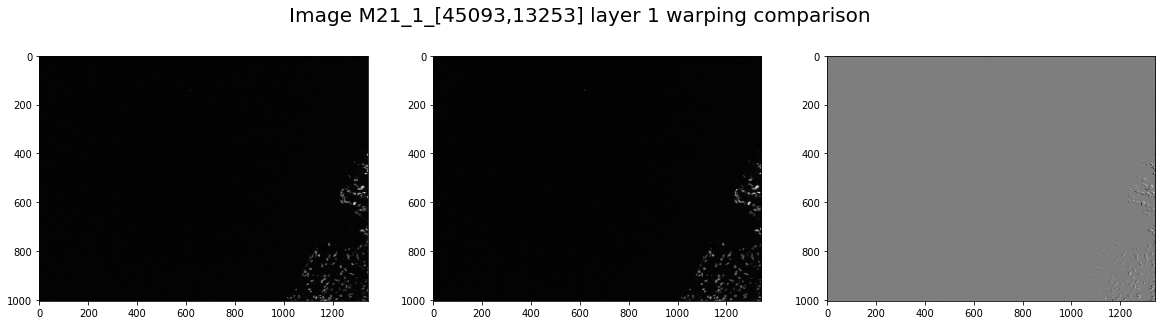

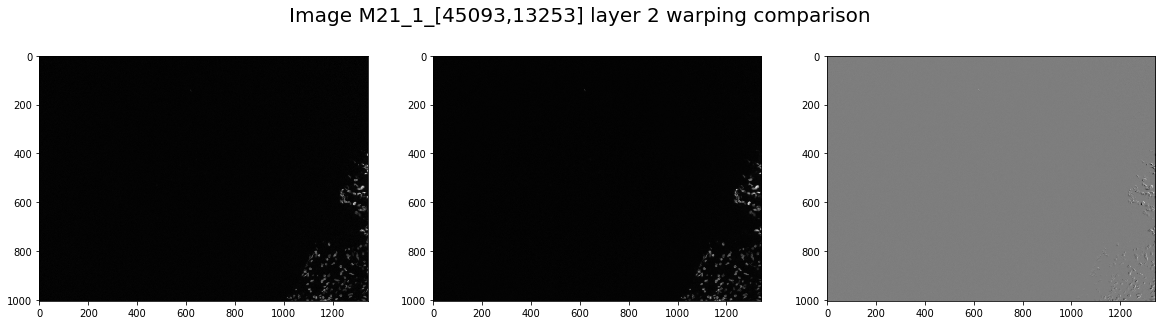

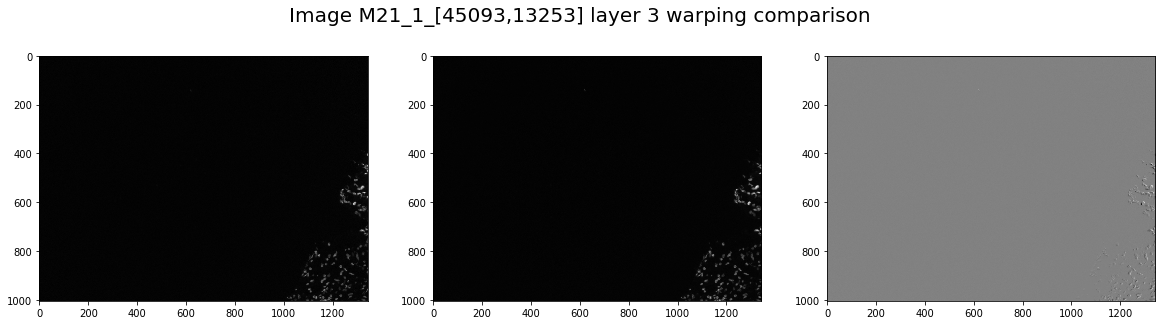

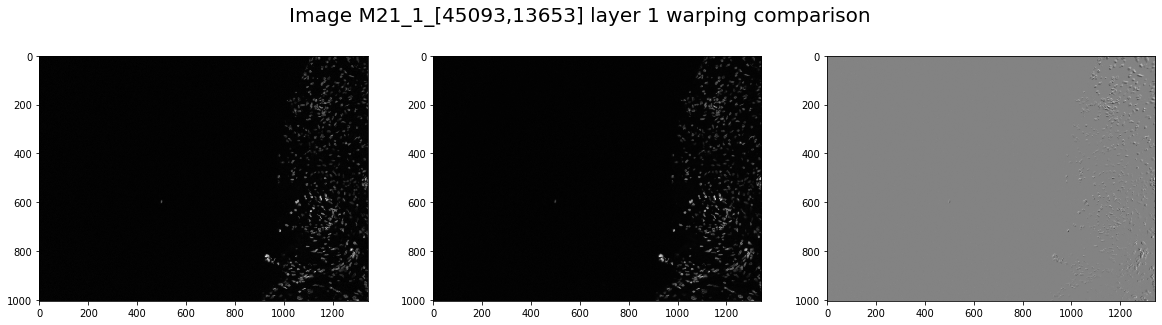

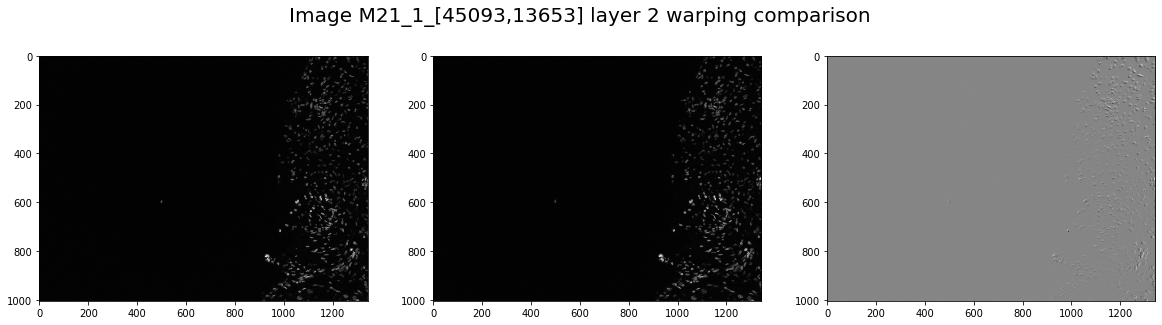

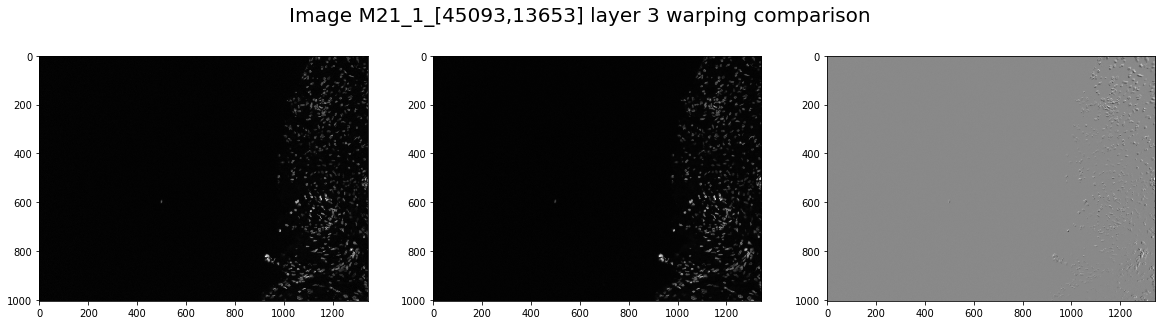

In [6]:
#change to the directory with the files in it 
os.chdir(io_dir)
#get list of files to operate on
search_pattern = samp_name+"_[[]*[]]"+file_ext
filelist = glob.glob(search_pattern)
if verbose : print(f"Found {len(filelist)} files matching pattern \"{search_pattern}\" in directory {os.getcwd()}")
#run the warping for each file
for i,fname in enumerate(filelist) :
    if i>=max_images :
        print("max_images reached")
        break
    if verbose : print(f"    Warping image {fname} ({i+1} of {len(filelist)})...")
    warpImageWithField(warpfield,fname,file_ext,showimgs=verbose)
if verbose : print("Done.")
#change back to initial directory
os.chdir(initdir)